# HSE 2025: Mathematical Methods for Data Analysis

## Homework 4: Clustering & Anomaly Detection

### Contents

#### PCA, t-SNE – 4 points
* [Task 1](#task1) (1.5 points)
* [Task 2](#task2) (0.5 points)
* [Task 3](#task3) (0.5 points)
* [Task 4](#task3) (1 points)
* [Task 5](#task4) (0.5 points)

#### Clustering – 6 points
* [Task 5](#task5) (1.5 points)
* [Task 6](#task6) (1.5 points)
* [Task 7](#task7) (1.5 points)
* [Task 8](#task8) (0.5 point)
* [Task 9](#task8) (1 point)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Load the file `uci_har.csv`.

In [13]:
import pandas as pd
data = pd.read_csv('uci_har.csv')
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


This [dataset](http://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones) consists of database built from the recordings of 30 subjects performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors.

In [14]:
data.shape

(7352, 563)

The target column is "Activity" which is the latest column, put it in a separate variable.

In [15]:
import numpy as np

X, y_name = np.array(data.iloc[:, :-1]), data.iloc[:, -1]

**Task 1. <a id="task1"></a> (1.5 points)** Let's do the following pipeline (detailed instructions will be in next cells)

- Encode your textual target.
- Split your data into train and test. Train a simple classification model without any improvements and calculate metrics.
- Then let's look at the low dimensional representations of the features and look at the classes there. We will use linear method PCA and non-linear t-SNE (t-distributed stochastic neighbor embedding). In this task we learn how to visualize data at the low dimensional space and check whether the obtained points are separable or not.

The target variable takes a text value. Use the `LabelEncoder` from `sklearn` to encode the text variable `y_name` and save the resulting values to the variable `y`.

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y_name)

Split your data into **train** and **test** keeping 30% for the test.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Train SVM with linear kernel on your data to predict target. Calculate accuracy, F-score. Also print out confusion matrix

In [18]:
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f'accuracy: {accuracy}, f1-score: {f1}')

accuracy: 0.9845874886672711, f1-score: 0.9853546497147133


In [20]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[428   0   0   0   0   0]
 [  0 369  17   0   0   0]
 [  0  13 398   0   0   0]
 [  0   0   0 365   0   1]
 [  0   0   0   1 310   0]
 [  0   0   0   0   2 302]]


Let's try Principal Component Analysis. Use the `PCA` method from `sklearn.decomposiion` to reduce the dimension of the feature space to two. Fix `random_state=1`

In [21]:
pca = PCA(2, random_state=1)
X_pca = pca.fit_transform(X, y)

Draw the objects in a two-dimensional feature space using the `scatter` method from `matplotlib.pyplot`. To display objects of different classes in different colors, pass `c = y` to the `scatter` method.

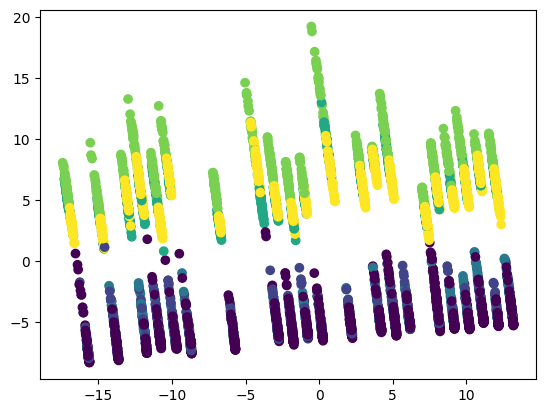

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show()

Do the same procedure as in two previous cells, but now for the `TSNE` method from `sklearn.manifold`.

In [23]:
tsne = TSNE(2, random_state=1)
X_tsne = tsne.fit_transform(X, y)

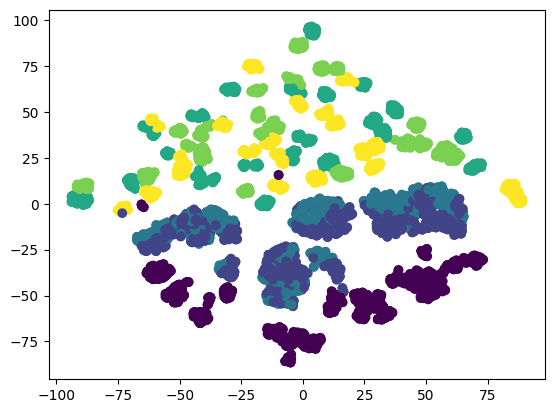

In [24]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.show()

**Task 2. <a id="task2"></a> (0.5 points)** Specify the coordinates of the object with index 2 (`X[2]`) after applying the TSNE method. Round the numbers to hundreds.

In [25]:
cords_2_tsne = np.round(X_tsne[2], 2)

print(cords_2_tsne)

[-63.74 -19.72]


**Task 3. <a id="task3"></a> (0.5 points)** Specify the coordinates of the object with index 2 (`X[2]`) after applying the PCA method. Round the numbers to hundreds.

In [26]:
cords_2_pca = np.round(X_pca[2], 2)

print(cords_2_pca)

[-15.74  -7.2 ]


**Task 4. <a id="task4"></a> (1 points)** What conclusions can be drawn from the obtained images? Choose the right one(s).

1) Using the principal components method, it was possible to visualize objects on a plane and objects of different classes are visually separable

2) Using the TSNE method, it was possible to visualize objects on a plane and objects of different classes are visually separable

3) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable

4) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are not visually separable

По построенным графикам видим, что TSNE показывает более явное разделение, а PCA - частичное. Так что, стоит выбрать вариант 2, если отвечать на вопрос о том, какой из методов лучше, однако 3 вариант так же верен, но это более общее утверждение.

Ответ: 2 и 3.

**Task 5. (0.5 points)** Again try to fit your simple classifier, this time using transformed data to two-dimensional space. To do it choose the best feature representation in your opinion from two existing. Did the metrics improve?

In [27]:
X_tsne_train, X_tsne_test, y_tsne_train, y_tsne_test = train_test_split(X_tsne, y, test_size=0.3, random_state=42)
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_tsne_train, y_tsne_train)
y_tsne_pred = svc.predict(X_tsne_test)

accuracy = accuracy_score(y_tsne_test, y_tsne_pred)
f1 = f1_score(y_tsne_test, y_tsne_pred, average='macro')
print(f"accuracy: {accuracy}")
print(f"f1-score: {f1}")

accuracy: 0.514959202175884
f1-score: 0.41842908864078754


In [28]:
cm = confusion_matrix(y_tsne_test, y_tsne_pred)
print(cm)

[[381  46   0   0   0   1]
 [ 90  64 232   0   0   0]
 [ 41  64 304   0   0   2]
 [  0   0   9 314   0  43]
 [  0   0   0 232   0  79]
 [  0   0  33 198   0  73]]


Метрики очень сильно ухудшились :( жестко потеряли различия. По матрице видим, что классы путаются между собой и потеряли разделимость. Идея применять TSNE в этом случае не очень хорошая.

## K_means

**Task 6. <a id="task5"></a> (1.5 points)** Implement the MyKMeans class.

The class must match the template shown below. Please, add code where needed. Some guidelines are the following:

The class constructor is passed to:
- n_clusters - the number of clusters that the data will be split into

- n_iters - the maximum number of iterations that can be done in this algorithm

Realize `update_centers` and `update_labels` methods.


In the `fit` method:

- Write sequential call of `self_centers` and `self_labels`.

then in the loop by the number of iterations you need to implement:
- calculate the nearest cluster center for each object
- recalculate the center of each cluster (the average of each of the coordinates of all objects assigned to this cluster)
put the calculated new cluster centers in the `new_centers` variable

In the `predict` method:

the nearest cluster centers for `X` objects are calculated

In [81]:
from IPython.display import clear_output
from sklearn.metrics import pairwise_distances_argmin

def plot_clust(X, centers, lables, ax, plot=True):
    if not plot:
      return
    ax.scatter(X[:,0], X[:,1], c=lables)
    ax.scatter(centers[:,0], centers[:,1], marker='>', color='red')


class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100, seed=None, plot=True):
        self.n_clusters = n_clusters
        self.labels = None
        self.centers = None
        self.n_iters = n_iters
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)
        self.plot = plot # чтоб не рисовало графики в 8, а то зависает

    def update_centers(self, X):
        centers = np.zeros_like(self.centers)

        for i in range(self.n_clusters):
            centers[i] = np.mean(X[self.labels == i], axis=0)

        return centers

    def update_labels(self, X):
        labels = pairwise_distances_argmin(X, self.centers)
        return labels

    def fit(self, X):
        idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centers = X[idx]
        self.labels = np.zeros(X.shape[0])

        for it in range(self.n_iters):
            new_labels = self.update_labels(X)
            self.labels = new_labels

            new_centers = self.update_centers(X)
            if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels

                if self.plot:
                  print('Converge by tolerance centers')
                  fig, ax = plt.subplots(1,1)
                  plot_clust(X, new_centers, new_labels, ax, self.plot)
                  return 0

            self.centers = new_centers

            if  self.plot:
              fig, ax = plt.subplots(1,1)
              plot_clust(X, new_centers, new_labels, ax, self.plot)
              plt.pause(0.3);
              if (it != self.n_iters - 1):
                clear_output(wait=True); # последний оставляем


        return 1

    def predict(self, X):
        labels = self.update_labels(X)
        return labels

Generating data for clustering

In [72]:
from sklearn import datasets
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 0.5, 0.5],
                             random_state=0)

In [73]:
X, y = noisy_blobs

**Task 7. <a id="task6"></a> (1.5 points)**

7.1 Cluster noisy_blobs objects with `MyKMeans`, use the hyperparameters `n_clusters=3`, `n_iters=3`. Plot result. Specify the result label for the object with index 0.

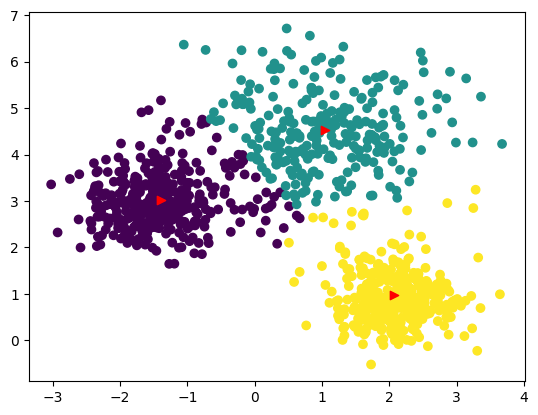

1

In [74]:
kmeans = MyKMeans(n_clusters=3, n_iters=3)
kmeans.fit(X)

In [75]:
pred_3 = kmeans.predict(X)
print(pred_3[0])

0


7.2 Cluster noisy_blobs objects, use the hyperparameters `n_clusters=3`, `n_iters = 100`. Plot result. Specify the result label for the object with index 0.

Converge by tolerance centers


0

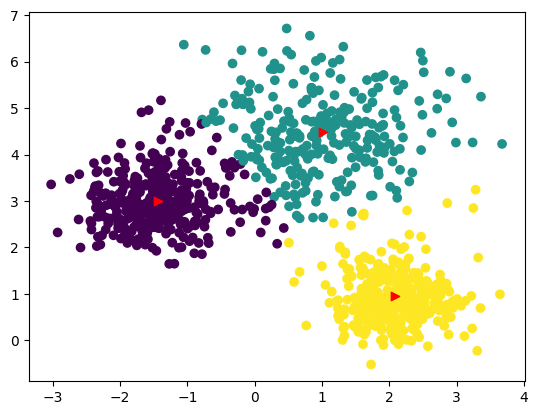

In [82]:
kmeans = MyKMeans(n_clusters=3, n_iters=100)
kmeans.fit(X)

In [83]:
pred_100 = kmeans.predict(X)
print(pred_100[0])

0


7.3 Calculate how many objects changed the label of the predicted cluster when changing the hyperparameter n_iters from 3 to 100

In [79]:
non_equals = pred_3 != pred_100

num_of_changed = non_equals.sum()
print(num_of_changed)

4


**Task 8. <a id="task6"></a> (1.5 points)**

Using the elbow method, select the optimal number of clusters, show it on the plot. As a metric, use the sum of the squares of the distances between the data points and the centroids of the clusters assigned to them divided by number of clusters. To do this, iterate the parameter k from 2 to 50 in steps of 2.

In [95]:
k = np.arange(2, 50, 2)
metrics = np.zeros(k.shape)

for i in range(k.shape[0]):
    kmeans = MyKMeans(n_clusters=k[i], plot=False)
    kmeans.fit(X)
    cur_sum = 0
    for j in range(X.shape[0]):
        cur_sum += np.linalg.norm(kmeans.centers[kmeans.labels[j]] - X[j, :]) ** 2
    cur_sum /= k[i]
    metrics[i] = cur_sum

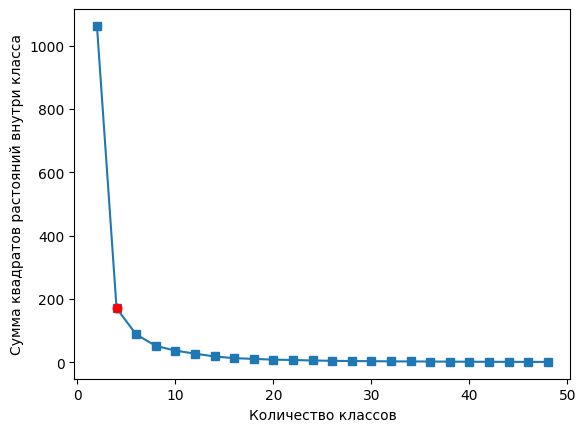

In [97]:
plt.plot(k, metrics, marker='s')
plt.plot(k[1], metrics[1], marker='o', color='red')
plt.xlabel('Количество классов')
plt.ylabel('Сумма квадратов растояний внутри класса')
plt.show() # по методу локтя получаем 4

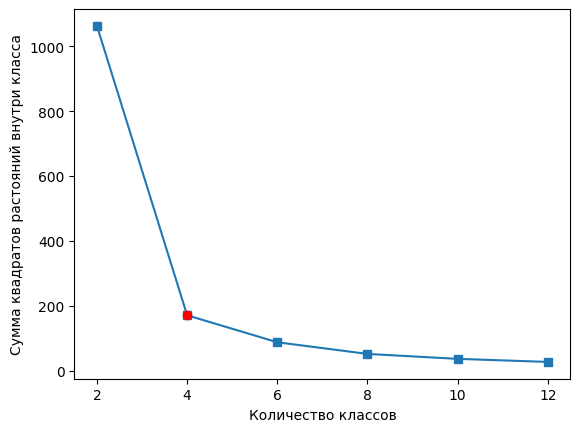

In [106]:
k = np.arange(2, 14, 2)
metrics = np.zeros(k.shape)

for i in range(k.shape[0]):
    kmeans = MyKMeans(n_clusters=k[i], plot=False)
    kmeans.fit(X)
    cur_sum = 0
    for j in range(X.shape[0]):
        cur_sum += np.linalg.norm(kmeans.centers[kmeans.labels[j]] - X[j, :]) ** 2
    cur_sum /= k[i]
    metrics[i] = cur_sum


plt.plot(k, metrics, marker='s')
plt.plot(k[1], metrics[1], marker='o', color='red')
plt.xlabel('Количество классов')
plt.ylabel('Сумма квадратов растояний внутри класса')
plt.show()

## DBSCAN

**Task 9. <a id="task7"></a> (0.5 points)** Cluster noisy_blobs objects using DBSCAN. Use the DBSCAN implementation from sklearn. Fix the `eps=0.3` hyperparameter. Plot result. Specify the response for the object with index 2.

In [98]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3)
clusters = dbscan.fit_predict(X)

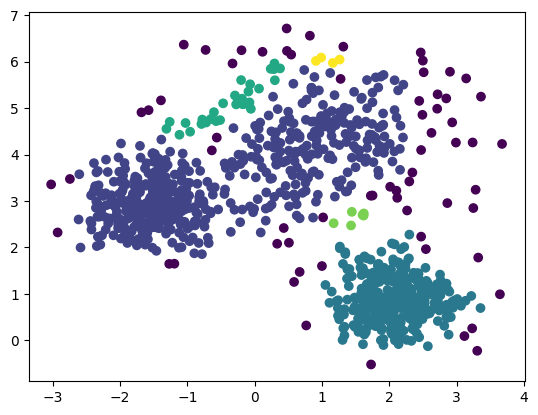

In [100]:
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.show()

In [101]:
print(clusters[2])

0


**Task 10. <a id="task8"></a> (1 point)**

Try different settings of ```eps``` distances (from 0.1 to 0.5) and several values of your choice of ```min_samples```. For each setting plot results. Also output the number of clusters and outliers (objects marked as -1).

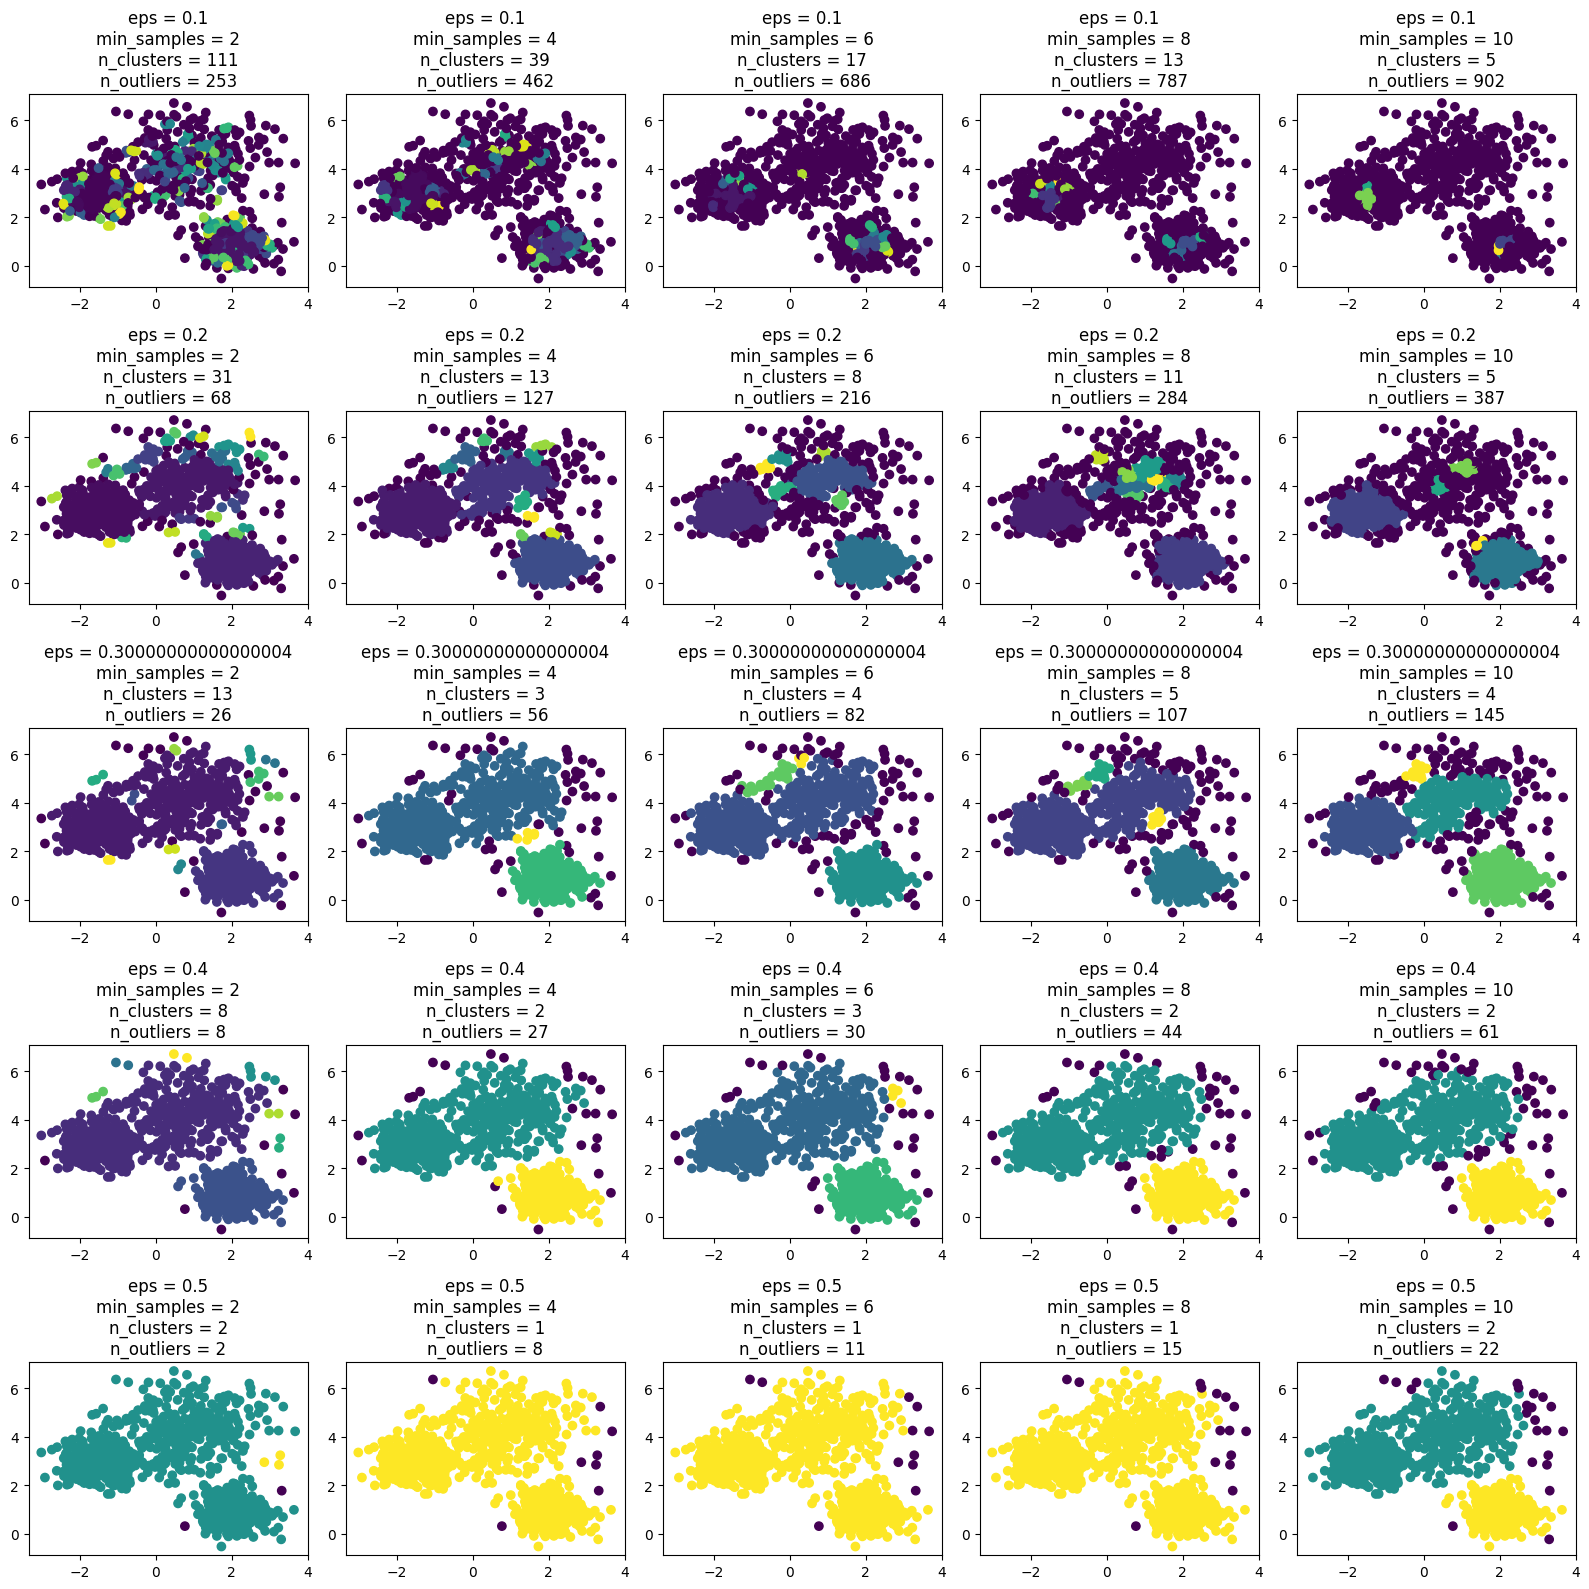

In [104]:
eps = np.linspace(0.1, 0.5, 5)
min_samples = np.arange(2, 11, 2)
assert eps.size == min_samples.size

def calculate_n_clusters_and_outliers(clusters: np.ndarray):
    return np.unique(clusters[clusters != -1]).size, np.count_nonzero(clusters == -1)
fig, axes = plt.subplots(eps.size, min_samples.size, figsize=(16, 16))

for i in range(eps.size):
    for j in range(min_samples.size):
        dbscan = DBSCAN(eps=eps[i], min_samples=min_samples[j])
        clusters = dbscan.fit_predict(X)
        n_clusters, n_outliers = calculate_n_clusters_and_outliers(clusters)
        axes[i, j].scatter(X[:, 0], X[:, 1], c=clusters)
        axes[i, j].set_title(f"eps = {eps[i]}\nmin_samples = {min_samples[j]}\n{n_clusters = }\n{n_outliers = }")

fig.tight_layout()